Notebook Test

In [ ]:
%pip install --upgrade matplotlib

In [7]:
# All imports here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import joblib
from sklearn.tree import plot_tree

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns

# Storing model scores
r2_list = []
oob_list = []

# List of columns for iterating
columns = list(Y)
# print(predictors_df) # 211 x 33
# print(outcomes_df) # 211 x 41


In [ ]:
# DO NOT RUN ON MY PC IT WILL MAYBE EXPLODE

# Iterate through each class of genes
for i in columns:
    
    # resetting the r2 and best model value for each column
    r2 = 0
    best_model = RandomForestRegressor()
    
    # Iterate through common proportions of test/train data
    for j in [0.2, 0.4, 0.6, 0.8]:

        # Split Data
        x_train, x_test, y_train, y_test = train_test_split(X, Y[i], test_size=j) 

        # Iterate through common n_estimators
        for k in [100, 500, 1000]:

            # Create model
            rf = RandomForestRegressor(n_estimators=k, random_state=0, oob_score=True) # add max_features here
            rf = rf.fit(x_train, y_train)

            # Find model r squared
            predictions = rf.predict(x_test)
            new_r2 = abs(r2_score(y_test, predictions)) # using absolute value for comparision

             # Compare model
            if new_r2 > r2:
                r2 = new_r2
                # Saving the better model
                best_model = rf
    
    # Finally dumping the best model for the class
    joblib.dump(best_model, f"my_random_forest{i}.joblib")
    # Storing highest r2 and oob scores
    r2_list.append(r2)
    oob_list.append(best_model.oob_score_)
    # Printing highest r2 value and oob
    print(f"{i} r2: {r2}\n{i} oob score: {best_model.oob_score_}")



'\nfor i in columns:\n    r2 = 0 # resetting the r2 value for each column\n    # split data for each class\n    X_train, X_test, Y_train, Y_test = train_test_split(X, Y[i], test_size=0.6)\n\n    for j in range(10): # Training 10 models to compare\n        # train model\n        rf = RandomForestRegressor(n_estimators=500, max_depth= 4, random_state=0, oob_score=True)\n        rf = rf.fit(X_train, Y_train)\n\n        # evaluate model\n        predictions = rf.predict(X_test)\n        new_r2 = abs(r2_score(Y_test, predictions)) # using absolute value for comparision\n\n        # Compare model\n        if new_r2 > r2:\n            r2 = new_r2\n            # Saving the better model\n            joblib.dump(rf, f"my_random_forest{i}.joblib")\n    # Printing highest r2 value\n    print(f"{i} r2: {r2}")\n\n'

In [ ]:
# Visualizing Random Forest using feature plots and decision tree diagrams

for k in columns:
    # Loading saved models
    loaded_rf = joblib.load(f"my_random_forest{k}.joblib")
        
    # Obtain permutation feature importances, then find the mean
    feature_importance = permutation_importance(loaded_rf, x_test, y_test, random_state=0)
    forest_importances = pd.Series(feature_importance.importances_mean, index=feature_names)

    # Plot feature importance
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=feature_importance.importances_std, ax=ax) # adds std bar
    ax.set_title(f"{k} Permutation Feature Importances")
    ax.set_ylabel("Mean Accuracy Decrease")
    plt.show()

    # Saving the figure
    plt.savefig(f'{k}_features.png')

    # Plotting the decision tree
    tree = loaded_rf.estimators_[0]
    plt.figure(figsize=(60,30))  # Allows more zoom to read the tree
    plot_tree(tree, 
            feature_names=feature_names,
            filled=True,
            rounded=True)
    plt.title("Decision Tree from the Random Forest")
    plt.show()

    # Saving the tree
    plt.savefig(f'{k}_tree.png')

NameError: name 'columns' is not defined

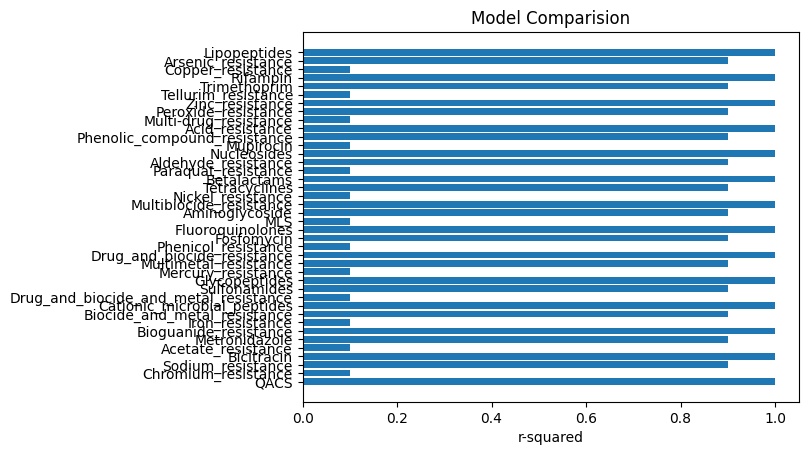

In [ ]:
# Plotting an overall comparision of different models and their r2 and oob scores

# Test r2_list = [1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0, 0.9, 0.1, 1.0]
fig, ax = plt.subplots()

ax.barh(np.arange(len(columns)), r2_list, align='center')
ax.set_yticks(np.arange(len(columns)), labels=columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('r-squared')
ax.set_title('Model Comparision')

plt.show()


In [ ]:
'''
# TEST for single model

# Removing the first column (sample IDs) and converting to numpy array
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df['Lipopeptides']

# Split the data into training and test sets with an 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating the Random Forest model
rf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True)
rf = rf.fit(X_train, Y_train)

# Out of Bag Score
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = rf.predict(X)
# Finding MSE
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')
# Finding r2
r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

# Saving the model 
import joblib

joblib.dump(rf, "my_random_forest.joblib")

# Visualizing Random Forest on a single model test

# for k in columns:
    # Loading saved models
loaded_rf = joblib.load(f"my_random_forestQACS.joblib")
    
    # obtain permutation feature importance
feature_importance = permutation_importance(loaded_rf, x_test, y_test, random_state=0)

forest_importances = pd.Series(feature_importance.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=feature_importance.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.show()
'''

Need to consider how im changing max_features